In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [413]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix
    )
from sklearn.model_selection import StratifiedKFold

In [414]:
df_train=pd.read_csv('train_mesra.csv')
df_train

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,4622,1762,C,Placebo,20909,M,NaN,N,NaN,N,0.9,360.0,2.43,NaN,3444.4,131.59,130.0,314.0,12.9,1.0
6796,4446,2955,C,Placebo,28650,F,Y,N,N,N,0.3,NaN,2.99,43.0,NaN,NaN,238.0,399.0,10.6,4.0
6797,4082,584,C,NaN,24102,F,N,Y,NaN,N,0.3,218.0,2.79,NaN,NaN,26.35,123.0,103.0,9.3,1.0
6798,2248,1426,CL,D-penicillamine,19791,F,N,NaN,Y,N,0.3,NaN,1.96,12.0,289.0,72.95,134.0,354.0,10.6,2.0


In [415]:
df_train[df_train['Stage']==4.0]['Sex'].value_counts()

F    2989
M     517
Name: Sex, dtype: int64

In [416]:
df_train['Status'].value_counts()

C     3643
D     2619
CL     538
Name: Status, dtype: int64

In [417]:
df_train['Status'].replace({'CL': 'C'}, inplace=True)

In [418]:
df_train['Status'].value_counts()

C    4181
D    2619
Name: Status, dtype: int64

In [419]:
del df_train['ID']

In [420]:
df_train[pd.isnull(df_train['N_Days'])] ## no missing value

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [421]:
print(df_train['Status'].unique())
print(df_train['Status'].value_counts())

df_train[pd.isnull(df_train['Status'])] ## no missing value

['C' 'D']
C    4181
D    2619
Name: Status, dtype: int64


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [422]:
df_train['Drug'].head(10)

0    D-penicillamine
1    D-penicillamine
2                NaN
3    D-penicillamine
4    D-penicillamine
5            Placebo
6                NaN
7            Placebo
8                NaN
9                NaN
Name: Drug, dtype: object

In [423]:
print(df_train['Drug'].unique())
print(df_train['Drug'].value_counts())

df_train[pd.isnull(df_train['Drug'])] ##there are missing values =2025

## fill them using backfill method
df_train['Drug']=df_train['Drug'].fillna(method='ffill')

print(df_train['Drug'].unique())
print(df_train['Drug'].value_counts())
df_train[pd.isnull(df_train['Drug'])]

['D-penicillamine' nan 'Placebo']
D-penicillamine    2434
Placebo            2341
Name: Drug, dtype: int64
['D-penicillamine' 'Placebo']
D-penicillamine    3494
Placebo            3306
Name: Drug, dtype: int64


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [424]:
df_train['Drug'].head(10)

0    D-penicillamine
1    D-penicillamine
2    D-penicillamine
3    D-penicillamine
4    D-penicillamine
5            Placebo
6            Placebo
7            Placebo
8            Placebo
9            Placebo
Name: Drug, dtype: object

In [425]:
## since the age is in days we convert it to years by dividing by 365

df_train[pd.isnull(df_train['Age'])] # no misiing values

df_train['Age']=(df_train['Age']/365)
df_train



,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1654,C,D-penicillamine,53.646575,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,41,C,D-penicillamine,62.684932,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,297,D,D-penicillamine,76.594521,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,1872,C,D-penicillamine,57.838356,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,939,C,D-penicillamine,49.482192,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,1762,C,Placebo,57.284932,M,NaN,N,NaN,N,0.9,360.0,2.43,NaN,3444.4,131.59,130.0,314.0,12.9,1.0
6796,2955,C,Placebo,78.493151,F,Y,N,N,N,0.3,NaN,2.99,43.0,NaN,NaN,238.0,399.0,10.6,4.0
6797,584,C,Placebo,66.032877,F,N,Y,NaN,N,0.3,218.0,2.79,NaN,NaN,26.35,123.0,103.0,9.3,1.0
6798,1426,C,D-penicillamine,54.221918,F,N,NaN,Y,N,0.3,NaN,1.96,12.0,289.0,72.95,134.0,354.0,10.6,2.0


In [426]:
df_train['Age']=df_train['Age'].astype(int) ## converting the age column to int
df_train

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1654,C,D-penicillamine,53,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,41,C,D-penicillamine,62,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,297,D,D-penicillamine,76,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,1872,C,D-penicillamine,57,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,939,C,D-penicillamine,49,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,1762,C,Placebo,57,M,NaN,N,NaN,N,0.9,360.0,2.43,NaN,3444.4,131.59,130.0,314.0,12.9,1.0
6796,2955,C,Placebo,78,F,Y,N,N,N,0.3,NaN,2.99,43.0,NaN,NaN,238.0,399.0,10.6,4.0
6797,584,C,Placebo,66,F,N,Y,NaN,N,0.3,218.0,2.79,NaN,NaN,26.35,123.0,103.0,9.3,1.0
6798,1426,C,D-penicillamine,54,F,N,NaN,Y,N,0.3,NaN,1.96,12.0,289.0,72.95,134.0,354.0,10.6,2.0


In [427]:
df_train['Age'].min()

26

(20.0, 80.0, 0.0, 1000.0)

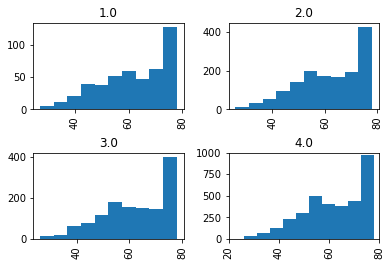

In [428]:
df_train.hist(by='Stage',column='Age')
plt.gca().axis([20,80,0,1000])

## we can see from below plot that as the age increases the chances of diagnosing with stage 4>3>2>1
## which means as age increases the probability of getiing diagnosed with stage 4>3>2>1

In [429]:
df_train[pd.isnull(df_train['Sex'])] # no missing values
print(df_train['Sex'].value_counts())



F    5835
M     965
Name: Sex, dtype: int64


array([<AxesSubplot:title={'center':'F'}>,
       <AxesSubplot:title={'center':'M'}>], dtype=object)

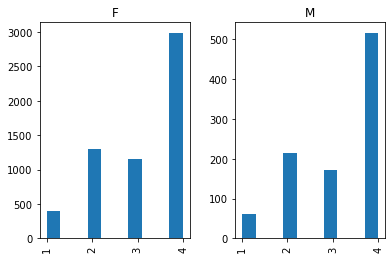

In [430]:
df_train.hist(by='Sex',column='Stage')
## it can be seen that the no of females diagnosed by every stage is >> no of males diagnosed with that particular stage

In [431]:
df_train['Age']

0       53
1       62
2       76
3       57
4       49
        ..
6795    57
6796    78
6797    66
6798    54
6799    69
Name: Age, Length: 6800, dtype: int32

In [432]:

## Ascitesis when too much fluid builds up in your abdomen

##Although the disease can affect any age group, it mostly afflicts people between 30 and 50 years of age.

print(df_train['Ascites'].unique())
print(df_train['Ascites'].value_counts())

# df_train[pd.isnull(df_train['Ascites'])] ##there are missing values =2246

cond =  df_train['Age'] >30 




df_train['Ascites'] =df_train['Ascites'].fillna(cond.map({True:'Y', False: 'N'}))



print(df_train['Ascites'].unique())
print(df_train['Ascites'].value_counts())
# df_train[pd.isnull(df_train['Ascites'])]

['N' nan 'Y']
N    3973
Y     581
Name: Ascites, dtype: int64
['N' 'Y']
N    3994
Y    2806
Name: Ascites, dtype: int64


In [433]:
a=2
cond=a<5 and a>1
print(cond)

True


array([<AxesSubplot:title={'center':'N'}>,
       <AxesSubplot:title={'center':'Y'}>], dtype=object)

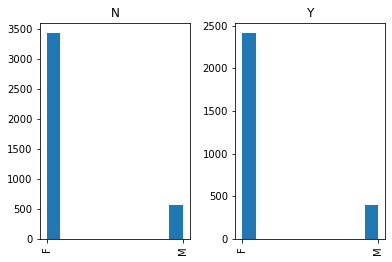

In [434]:
df_train.hist(by='Ascites',column='Sex')

In [435]:
## Hepatomegaly is an enlarged liver, which means it's swollen beyond its usual size

##However, women were more likely than men to present with the hepatic form
##than the neuropsychiatric form (58% vs 42%, respectively).

print(df_train['Hepatomegaly'].unique())
print(df_train['Hepatomegaly'].value_counts())

cond = df_train['Sex'] == 'F'
df_train['Hepatomegaly'] =df_train['Hepatomegaly'].fillna(cond.map({True:'Y', False: 'N'}))



print(df_train['Hepatomegaly'].unique())
print(df_train['Hepatomegaly'].value_counts())
df_train[pd.isnull(df_train['Hepatomegaly'])]

['N' 'Y' nan]
N    2554
Y    1819
Name: Hepatomegaly, dtype: int64
['N' 'Y']
Y    3899
N    2901
Name: Hepatomegaly, dtype: int64


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


array([<AxesSubplot:title={'center':'N'}>,
       <AxesSubplot:title={'center':'Y'}>], dtype=object)

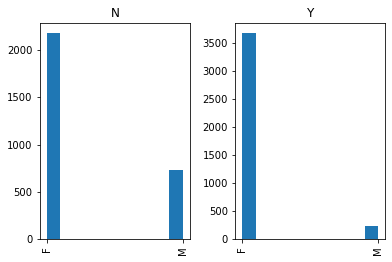

In [436]:
df_train.hist(by='Hepatomegaly',column='Sex')

In [437]:
## Spider angiomas may appear when the body has increased levels of oestrogen hormones such as in pregnancy 
## or when taking the oral contraceptive pill. They may also occasionally occur in patients with liver or thyroid disease. 

print(df_train['Spiders'].unique())
print(df_train['Spiders'].value_counts())


## since presence of spiders is mostly in women so we will fill the null values with yes if corres sex is femeale

cond = df_train['Sex'] == 'F'
df_train['Spiders'] =df_train['Spiders'].fillna(cond.map({True:'Y', False: 'N'}))

df_train[pd.isnull(df_train['Spiders'])]

print(df_train['Spiders'].unique())
print(df_train['Spiders'].value_counts())

['Y' nan 'N']
N    2910
Y    1300
Name: Spiders, dtype: int64
['Y' 'N']
Y    3525
N    3275
Name: Spiders, dtype: int64


array([<AxesSubplot:title={'center':'N'}>,
       <AxesSubplot:title={'center':'Y'}>], dtype=object)

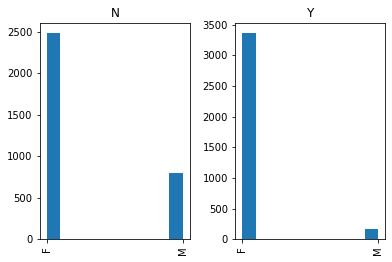

In [438]:
df_train.hist(by='Spiders',column='Sex')

In [439]:
df_train['Edema'].value_counts()

N    5326
S    1023
Y     451
Name: Edema, dtype: int64

In [440]:
print(df_train['Edema'].unique())
print(df_train['Edema'].value_counts())

df_train[pd.isnull(df_train['Edema'])]

## 'S' and 'Y' means edema is present so we can convert 'S' to 'Y'
df_train['Edema'].replace({'S': 'Y'}, inplace=True)

print(df_train['Edema'].unique())
print(df_train['Edema'].value_counts())

['N' 'S' 'Y']
N    5326
S    1023
Y     451
Name: Edema, dtype: int64
['N' 'Y']
N    5326
Y    1474
Name: Edema, dtype: int64


In [441]:
df_train['Edema'].value_counts()

N    5326
Y    1474
Name: Edema, dtype: int64

In [442]:
## bilirubin is -- serum bilirubin in [mg/dl] which is a continuous column in mg/dl



df_train[pd.isnull(df_train['Bilirubin'])] ## no missing value

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [443]:










df_train[pd.isnull(df_train['Cholesterol'])] ## 3101 missing values so use backfill


# Conditional mean is indeed a thing in pandas. You can use DataFrame.groupby():
meanf=df_train.groupby('Sex').mean().loc['F']['Cholesterol']
meanm=df_train.groupby('Sex').mean().loc['M']['Cholesterol']

cond = df_train['Sex'] == 'F'
df_train['Cholesterol'] =df_train['Cholesterol'].fillna(cond.map({True:meanf, False: meanm}))

# df_train['Cholesterol']=df_train['Cholesterol'].fillna(df_train['Cholesterol'].mean())

# df_train['Cholesterol']=df_train['Cholesterol'].fillna(method='bfill')

In [444]:
df_train[pd.isnull(df_train['Cholesterol'])]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [445]:
## albumin is in gm/dl so we will convert to mg/dl

df_train[pd.isnull(df_train['Albumin'])] # no missing values

df_train['Albumin']=df_train['Albumin']*1000

In [446]:
df_train[pd.isnull(df_train['Albumin'])]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [447]:
df_train

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1654,C,D-penicillamine,53,F,N,N,Y,N,0.3,279.000000,2960.0,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,41,C,D-penicillamine,62,F,Y,N,Y,N,0.3,294.347703,2960.0,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,297,D,D-penicillamine,76,F,N,N,Y,N,0.3,328.000000,2640.0,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,1872,C,D-penicillamine,57,F,Y,Y,Y,N,0.3,302.000000,2020.0,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,939,C,D-penicillamine,49,F,Y,Y,Y,N,0.5,344.000000,3110.0,91.0,NaN,104.56,NaN,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,1762,C,Placebo,57,M,Y,N,N,N,0.9,360.000000,2430.0,NaN,3444.4,131.59,130.0,314.0,12.9,1.0
6796,2955,C,Placebo,78,F,Y,N,N,N,0.3,294.347703,2990.0,43.0,NaN,NaN,238.0,399.0,10.6,4.0
6797,584,C,Placebo,66,F,N,Y,Y,N,0.3,218.000000,2790.0,NaN,NaN,26.35,123.0,103.0,9.3,1.0
6798,1426,C,D-penicillamine,54,F,N,Y,Y,N,0.3,294.347703,1960.0,12.0,289.0,72.95,134.0,354.0,10.6,2.0


In [448]:
df_train[pd.isnull(df_train['Copper'])] ## 3101 missing values so use backfill

# df_train['Copper']=df_train['Copper'].fillna(df_train['Copper'].mean())
# df_train['Copper']=df_train['Copper'].fillna(method='bfill')

meanf=df_train.groupby('Sex').mean().loc['F']['Copper']
meanm=df_train.groupby('Sex').mean().loc['M']['Copper']

cond = df_train['Sex'] == 'F'
df_train['Copper'] =df_train['Copper'].fillna(cond.map({True:meanf, False: meanm}))


df_train['Copper']=df_train['Copper']*0.001

df_train[pd.isnull(df_train['Copper'])]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [449]:
## copper is in ug/day to convert to mg/day multiply by 0.001
# df_train['Copper']=df_train['Copper']*0.001

In [450]:
df_train[pd.isnull(df_train['Alk_Phos'])] ## 3101 missing values so use backfill

meanf=df_train.groupby('Sex').mean().loc['F']['Alk_Phos']
meanm=df_train.groupby('Sex').mean().loc['M']['Alk_Phos']

cond = df_train['Sex'] == 'F'
df_train['Alk_Phos'] =df_train['Alk_Phos'].fillna(cond.map({True:meanf, False: meanm}))

# df_train['Alk_Phos']=df_train['Alk_Phos'].fillna(df_train['Alk_Phos'].mean())

# df_train['Alk_Phos']=df_train['Alk_Phos'].fillna(method='bfill')

## alk phos is in units/liter so convert it to units/dl divide by 10
df_train['Alk_Phos']=df_train['Alk_Phos']/10

In [451]:

df_train[pd.isnull(df_train['Alk_Phos'])]
# df_train

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [452]:
df_train[pd.isnull(df_train['SGOT'])] ## 3101 missing values so use backfill

# df_train['SGOT']=df_train['SGOT'].fillna(df_train['SGOT'].mean())
meanf=df_train.groupby('Sex').mean().loc['F']['SGOT']
meanm=df_train.groupby('Sex').mean().loc['M']['SGOT']

cond = df_train['Sex'] == 'F'
df_train['SGOT'] =df_train['SGOT'].fillna(cond.map({True:meanf, False: meanm}))


# df_train['SGOT']=df_train['SGOT'].fillna(method='bfill')
df_train['SGOT']=df_train['SGOT']*100

In [453]:
## SGOT is U/ml so convert to u/dl so multiply by 100


df_train[pd.isnull(df_train['SGOT'])]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [454]:
## triglycerides i in mg/dl so no change
df_train[pd.isnull(df_train['Tryglicerides'])] ## 3101 missing values so use backfill

meanf=df_train.groupby('Sex').mean().loc['F']['Tryglicerides']
meanm=df_train.groupby('Sex').mean().loc['M']['Tryglicerides']

cond = df_train['Sex'] == 'F'
df_train['Tryglicerides'] =df_train['Tryglicerides'].fillna(cond.map({True:meanf, False: meanm}))

# df_train['Tryglicerides']=df_train['Tryglicerides'].fillna(df_train['Tryglicerides'].mean())
# df_train['Tryglicerides']=df_train['Tryglicerides'].fillna(method='bfill')
df_train[pd.isnull(df_train['Tryglicerides'])]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [455]:
## platelets are in ml/cubic so convert to dl/cubic so multiply by 0.01
df_train[pd.isnull(df_train['Platelets'])] ## 3101 missing values so use backfill

meanf=df_train.groupby('Sex').mean().loc['F']['Platelets']
meanm=df_train.groupby('Sex').mean().loc['M']['Platelets']

cond = df_train['Sex'] == 'F'
df_train['Platelets'] =df_train['Platelets'].fillna(cond.map({True:meanf, False: meanm}))

# df_train['Platelets']=df_train['Platelets'].fillna(df_train['Platelets'].mean())

# df_train['Platelets']=df_train['Platelets'].fillna(method='bfill')
df_train['Platelets']=df_train['Platelets']*0.01

df_train[pd.isnull(df_train['Platelets'])]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [456]:
df_train

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1654,C,D-penicillamine,53,F,N,N,Y,N,0.3,279.000000,2960.0,0.084000,150.080000,9943.000000,109.000000,2.930000,10.2,4.0
1,41,C,D-penicillamine,62,F,Y,N,Y,N,0.3,294.347703,2960.0,0.068175,183.540000,2635.000000,131.000000,3.080000,10.8,1.0
2,297,D,D-penicillamine,76,F,N,N,Y,N,0.3,328.000000,2640.0,0.004000,181.643841,7929.621723,116.000000,1.940000,10.3,3.0
3,1872,C,D-penicillamine,57,F,Y,Y,Y,N,0.3,302.000000,2020.0,0.049000,181.643841,2635.000000,133.659848,2.933002,10.5,4.0
4,939,C,D-penicillamine,49,F,Y,Y,Y,N,0.5,344.000000,3110.0,0.091000,181.643841,10456.000000,133.659848,3.060000,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,1762,C,Placebo,57,M,Y,N,N,N,0.9,360.000000,2430.0,0.070909,344.440000,13159.000000,130.000000,3.140000,12.9,1.0
6796,2955,C,Placebo,78,F,Y,N,N,N,0.3,294.347703,2990.0,0.043000,181.643841,7929.621723,238.000000,3.990000,10.6,4.0
6797,584,C,Placebo,66,F,N,Y,Y,N,0.3,218.000000,2790.0,0.068175,181.643841,2635.000000,123.000000,1.030000,9.3,1.0
6798,1426,C,D-penicillamine,54,F,N,Y,Y,N,0.3,294.347703,1960.0,0.012000,28.900000,7295.000000,134.000000,3.540000,10.6,2.0


In [457]:
# A prothrombin time test (PT) measures the time it takes for a clot to form in a blood sample

df_train[pd.isnull(df_train['Prothrombin'])]

meanf=df_train.groupby('Sex').mean().loc['F']['Prothrombin']
meanm=df_train.groupby('Sex').mean().loc['M']['Prothrombin']

cond = df_train['Sex'] == 'F'
df_train['Prothrombin'] =df_train['Prothrombin'].fillna(cond.map({True:meanf, False: meanm}))

# df_train['Prothrombin']=df_train['Prothrombin'].fillna(df_train['Prothrombin'].mean())

# df_train['Prothrombin']=df_train['Prothrombin'].fillna(method='bfill')
df_train[pd.isnull(df_train['Prothrombin'])]


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [458]:
df_train

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1654,C,D-penicillamine,53,F,N,N,Y,N,0.3,279.000000,2960.0,0.084000,150.080000,9943.000000,109.000000,2.930000,10.2,4.0
1,41,C,D-penicillamine,62,F,Y,N,Y,N,0.3,294.347703,2960.0,0.068175,183.540000,2635.000000,131.000000,3.080000,10.8,1.0
2,297,D,D-penicillamine,76,F,N,N,Y,N,0.3,328.000000,2640.0,0.004000,181.643841,7929.621723,116.000000,1.940000,10.3,3.0
3,1872,C,D-penicillamine,57,F,Y,Y,Y,N,0.3,302.000000,2020.0,0.049000,181.643841,2635.000000,133.659848,2.933002,10.5,4.0
4,939,C,D-penicillamine,49,F,Y,Y,Y,N,0.5,344.000000,3110.0,0.091000,181.643841,10456.000000,133.659848,3.060000,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,1762,C,Placebo,57,M,Y,N,N,N,0.9,360.000000,2430.0,0.070909,344.440000,13159.000000,130.000000,3.140000,12.9,1.0
6796,2955,C,Placebo,78,F,Y,N,N,N,0.3,294.347703,2990.0,0.043000,181.643841,7929.621723,238.000000,3.990000,10.6,4.0
6797,584,C,Placebo,66,F,N,Y,Y,N,0.3,218.000000,2790.0,0.068175,181.643841,2635.000000,123.000000,1.030000,9.3,1.0
6798,1426,C,D-penicillamine,54,F,N,Y,Y,N,0.3,294.347703,1960.0,0.012000,28.900000,7295.000000,134.000000,3.540000,10.6,2.0


In [459]:
df_train['B/A']=df_train['Bilirubin']/df_train['Albumin']

In [460]:
df_train['LDL+HDL']=df_train['Cholesterol']-(df_train['Tryglicerides']/5)

In [461]:
df_train.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,B/A,LDL+HDL
count,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000
mean,1664.055441,62.143971,1.806147,294.577553,3036.117647,0.068563,180.289591,7954.462865,133.857804,2.933061,11.231024,3.157206,0.000602,267.805992
std,1332.308135,12.800896,3.218009,94.463461,528.164115,0.049286,128.748479,3610.220478,36.215909,1.122475,1.110565,0.993059,0.001094,94.531919
min,41.000000,26.000000,0.300000,120.000000,1960.000000,0.004000,28.900000,2635.000000,33.000000,0.620000,9.000000,1.000000,0.000065,63.600000
25%,537.000000,53.000000,0.300000,294.347703,2680.000000,0.047000,139.690000,5244.000000,124.000000,2.170000,10.500000,2.000000,0.000101,259.251023
50%,1443.000000,64.000000,0.400000,294.347703,3020.000000,0.068175,181.643841,7929.621723,133.659848,2.930000,11.100000,4.000000,0.000147,268.147703
75%,2519.000000,74.000000,1.800000,319.000000,3390.000000,0.081000,181.643841,10460.000000,135.054770,3.600000,11.700000,4.000000,0.000588,291.268030
max,4795.000000,78.000000,28.000000,1775.000000,4640.000000,0.588000,1386.240000,34048.000000,498.000000,5.630000,18.000000,4.000000,0.011336,1749.400000


In [462]:
df_train[df_train['N_Days']>df_train['Age']*365]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,B/A,LDL+HDL


In [463]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         6800 non-null   int64  
 1   Status         6800 non-null   object 
 2   Drug           6800 non-null   object 
 3   Age            6800 non-null   int32  
 4   Sex            6800 non-null   object 
 5   Ascites        6800 non-null   object 
 6   Hepatomegaly   6800 non-null   object 
 7   Spiders        6800 non-null   object 
 8   Edema          6800 non-null   object 
 9   Bilirubin      6800 non-null   float64
 10  Cholesterol    6800 non-null   float64
 11  Albumin        6800 non-null   float64
 12  Copper         6800 non-null   float64
 13  Alk_Phos       6800 non-null   float64
 14  SGOT           6800 non-null   float64
 15  Tryglicerides  6800 non-null   float64
 16  Platelets      6800 non-null   float64
 17  Prothrombin    6800 non-null   float64
 18  Stage   

In [464]:
# categorical columns which need to be label encoded are
from sklearn.preprocessing import LabelEncoder

print(df_train['Status'].unique())

print(df_train['Drug'].unique())

print(df_train['Sex'].unique())

print(df_train['Ascites'].unique())

print(df_train['Hepatomegaly'].unique())

print(df_train['Spiders'].unique())
print(df_train['Edema'].unique())

categ = ['Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']

# Encode Categorical Columns
scaler = LabelEncoder()
df_train[categ] = df_train[categ].apply(scaler.fit_transform)

print(df_train['Status'].unique())

print(df_train['Drug'].unique())

print(df_train['Sex'].unique())

print(df_train['Ascites'].unique())

print(df_train['Hepatomegaly'].unique())

print(df_train['Spiders'].unique())
print(df_train['Edema'].unique())

['C' 'D']
['D-penicillamine' 'Placebo']
['F' 'M']
['N' 'Y']
['N' 'Y']
['Y' 'N']
['N' 'Y']
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]


In [465]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scalecols=[]
for i in df_train.columns:
    if i!='Status' and i!='Drug' and i!= 'Sex' and i!='Ascites' and i!='Hepatomegaly' and i!='Spiders' and i!='Edema' and i!='Stage':
        scalecols.append(i)
        
scalecols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'B/A',
 'LDL+HDL']

In [466]:
scalecols


['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'B/A',
 'LDL+HDL']

In [467]:
from sklearn.preprocessing import StandardScaler
scaler_other= StandardScaler()
df_train[scalecols] = scaler_other.fit_transform(df_train[scalecols])

In [468]:
df_train

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,B/A,LDL+HDL
0,-0.007548,0,0,-0.714375,0,0,0,1,0,-0.468071,...,-0.144128,0.313243,-0.234658,0.550848,-0.686428,-0.002727,-0.928447,4.0,-0.457685,-0.112203
1,-1.218318,0,0,-0.011248,0,1,0,1,0,-0.468071,...,-0.144128,-0.007874,0.025248,-1.473554,-0.078916,0.130916,-0.388141,1.0,-0.457685,0.003615
2,-1.026156,1,0,1.082506,0,0,0,1,0,-0.468071,...,-0.750045,-1.310058,0.010519,-0.006881,-0.493129,-0.884772,-0.838396,3.0,-0.446451,0.391368
3,0.156090,0,0,-0.401874,0,1,1,1,0,-0.468071,...,-1.924009,-0.396951,0.010519,-1.473554,-0.005466,-0.000053,-0.658294,4.0,-0.414559,0.078943
4,-0.544250,0,0,-1.026876,0,1,1,1,0,-0.405917,...,0.139896,0.455282,0.010519,0.692955,-0.005466,0.113097,0.152164,2.0,-0.403351,0.523270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,0.073520,0,1,-0.401874,1,1,0,0,0,-0.281607,...,-1.147678,0.047609,1.275063,1.441718,-0.106530,0.184373,1.502928,1.0,-0.211696,0.700281
6796,0.969025,0,1,1.238757,0,1,0,0,0,-0.468071,...,-0.087323,-0.518699,0.010519,-0.006881,2.875804,0.941684,-0.568243,4.0,-0.458615,-0.222780
6797,-0.810725,0,1,0.301253,0,0,1,1,0,-0.468071,...,-0.466021,-0.007874,0.010519,-1.473554,-0.299830,-1.695541,-1.738905,1.0,-0.452038,-0.787157
6798,-0.178692,0,0,-0.636250,0,0,1,1,0,-0.468071,...,-2.037618,-1.147728,-1.175942,-0.182679,0.003927,0.540755,-0.568243,2.0,-0.410402,-0.002732


In [469]:
df_train.describe()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,B/A,LDL+HDL
count,6.800000e+03,6800.000000,6800.000000,6.800000e+03,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6.800000e+03,...,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6.800000e+03,6800.000000,6.800000e+03,6.800000e+03
mean,8.881784e-18,0.385147,0.486176,2.528696e-16,0.141912,0.412647,0.573382,0.518382,0.216765,-6.765830e-17,...,2.068933e-16,-3.931496e-17,2.716781e-17,1.149407e-16,-2.622739e-16,-2.486900e-16,6.112757e-16,3.157206,1.593497e-17,-2.382408e-16
std,1.000074e+00,0.486666,0.499846,1.000074e+00,0.348985,0.492347,0.494622,0.499699,0.412071,1.000074e+00,...,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,0.993059,1.000074e+00,1.000074e+00
min,-1.218318e+00,0.000000,0.000000,-2.823758e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-4.680713e-01,...,-2.037618e+00,-1.310058e+00,-1.175942e+00,-1.473554e+00,-2.785108e+00,-2.060832e+00,-2.009058e+00,1.000000,-4.912395e-01,-2.160339e+00
25%,-8.460042e-01,0.000000,0.000000,-7.143753e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-4.680713e-01,...,-6.743052e-01,-4.375336e-01,-3.153635e-01,-7.508301e-01,-2.722154e-01,-6.798527e-01,-6.582942e-01,2.000000,-4.576848e-01,-9.050486e-02
50%,-1.659314e-01,0.000000,0.000000,1.450028e-01,0.000000,0.000000,1.000000,1.000000,0.000000,-4.369939e-01,...,-3.051861e-02,-7.873661e-03,1.051935e-02,-6.881288e-03,-5.466394e-03,-2.727477e-03,-1.179887e-01,4.000000,-4.158902e-01,3.615033e-03
75%,6.417490e-01,1.000000,1.000000,9.262556e-01,0.000000,1.000000,1.000000,1.000000,0.000000,-1.910346e-03,...,6.700727e-01,2.523691e-01,1.051935e-02,6.940633e-01,3.305328e-02,5.942119e-01,4.223168e-01,4.000000,-1.248199e-02,2.482100e-01
max,2.350188e+00,1.000000,1.000000,1.238757e+00,1.000000,1.000000,1.000000,1.000000,1.000000,8.140368e+00,...,3.036935e+00,1.054004e+01,9.367405e+00,7.228217e+00,1.005550e+01,2.402849e+00,6.095525e+00,4.000000,9.815218e+00,1.567410e+01


In [470]:
df_train.corr()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,B/A,LDL+HDL
N_Days,1.000000,-0.003498,-0.019077,-0.068712,-0.013816,-0.001497,0.026930,0.011076,-0.013360,0.013037,...,-0.028400,0.006643,-0.009125,-0.019141,0.074985,0.041775,-0.006009,0.004066,0.018679,0.027781
Status,-0.003498,1.000000,0.011913,-0.000615,0.003752,-0.012106,-0.005309,0.014126,0.023684,0.008612,...,0.001990,-0.009171,-0.023510,-0.023007,-0.032460,-0.015638,-0.014371,-0.026697,0.010832,-0.027691
Drug,-0.019077,0.011913,1.000000,0.006736,0.007453,-0.002517,0.004996,-0.003988,0.011694,-0.010947,...,-0.018945,0.013798,0.020121,0.037108,0.015751,0.004803,-0.006181,-0.007622,-0.010687,0.009016
Age,-0.068712,-0.000615,0.006736,1.000000,0.013698,0.018110,0.014696,0.007370,0.007523,0.017301,...,-0.012003,-0.035950,0.011134,0.030426,0.024591,0.102334,0.004841,-0.001920,0.018896,-0.027786
Sex,-0.013816,0.003752,0.007453,0.013698,1.000000,0.000681,-0.268669,-0.280214,0.009023,0.006151,...,-0.010137,0.019361,-0.025867,0.016921,0.013442,0.000130,-0.006653,0.012433,0.007887,0.004949
Ascites,-0.001497,-0.012106,-0.002517,0.018110,0.000681,1.000000,-0.005986,-0.008119,-0.004525,-0.002437,...,0.000986,0.027367,-0.004665,-0.017878,0.003728,-0.003758,-0.026739,-0.027110,-0.000899,-0.000778
Hepatomegaly,0.026930,-0.005309,0.004996,0.014696,-0.268669,-0.005986,1.000000,0.075472,0.006375,-0.020335,...,0.010566,-0.028641,0.021383,-0.005330,-0.000105,0.007286,-0.011899,0.005107,-0.021170,0.023569
Spiders,0.011076,0.014126,-0.003988,0.007370,-0.280214,-0.008119,0.075472,1.000000,-0.003640,0.005994,...,0.013188,-0.016672,0.007410,0.012214,0.005216,-0.013592,-0.012040,-0.000934,0.005533,-0.000748
Edema,-0.013360,0.023684,0.011694,0.007523,0.009023,-0.004525,0.006375,-0.003640,1.000000,0.018306,...,0.014592,0.022001,0.010089,-0.004385,-0.022356,0.003521,0.027281,0.020587,0.016383,-0.007471
Bilirubin,0.013037,0.008612,-0.010947,0.017301,0.006151,-0.002437,-0.020335,0.005994,0.018306,1.000000,...,0.062583,0.000930,0.031570,0.016569,-0.007360,-0.036006,-0.019317,-0.010225,0.979070,0.004934


In [471]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_train))
df_train = df_train[(z <3).all(axis=1)]
# df_train.sample(frac=1)
print(z)

[[0.00754794 0.79145762 0.97272477 ... 0.84874705 0.45768479 0.11220307]
 [1.21831786 0.79145762 0.97272477 ... 2.17244295 0.45768479 0.00361503]
 [1.02615599 1.26349153 0.97272477 ... 0.15831628 0.44645148 0.39136758]
 ...
 [0.81072451 0.79145762 1.02804003 ... 2.17244295 0.45203794 0.78715702]
 [0.17869211 0.79145762 0.97272477 ... 1.16537962 0.4104017  0.0027325 ]
 [1.15526475 1.26349153 0.97272477 ... 0.84874705 0.9276987  0.13479731]]


In [472]:
z[z>3].shape

(1150,)

In [473]:
# df_train = df_train[(z <3).all(axis=1)]
# df_train.sample(frac=1)

In [474]:
y_train=df_train['Stage']
X_train=df_train.drop(['Stage'],axis=1,inplace=False)
X_train

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,B/A,LDL+HDL
0,-0.007548,0,0,-0.714375,0,0,0,1,0,-0.468071,-0.164918,-0.144128,0.313243,-0.234658,0.550848,-0.686428,-0.002727,-0.928447,-0.457685,-0.112203
1,-1.218318,0,0,-0.011248,0,1,0,1,0,-0.468071,-0.002433,-0.144128,-0.007874,0.025248,-1.473554,-0.078916,0.130916,-0.388141,-0.457685,0.003615
2,-1.026156,1,0,1.082506,0,0,0,1,0,-0.468071,0.353840,-0.750045,-1.310058,0.010519,-0.006881,-0.493129,-0.884772,-0.838396,-0.446451,0.391368
3,0.156090,0,0,-0.401874,0,1,1,1,0,-0.468071,0.078581,-1.924009,-0.396951,0.010519,-1.473554,-0.005466,-0.000053,-0.658294,-0.414559,0.078943
4,-0.544250,0,0,-1.026876,0,1,1,1,0,-0.405917,0.523230,0.139896,0.455282,0.010519,0.692955,-0.005466,0.113097,0.152164,-0.403351,0.523270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,0.073520,0,1,-0.401874,1,1,0,0,0,-0.281607,0.692620,-1.147678,0.047609,1.275063,1.441718,-0.106530,0.184373,1.502928,-0.211696,0.700281
6796,0.969025,0,1,1.238757,0,1,0,0,0,-0.468071,-0.002433,-0.087323,-0.518699,0.010519,-0.006881,2.875804,0.941684,-0.568243,-0.458615,-0.222780
6797,-0.810725,0,1,0.301253,0,0,1,1,0,-0.468071,-0.810718,-0.466021,-0.007874,0.010519,-1.473554,-0.299830,-1.695541,-1.738905,-0.452038,-0.787157
6798,-0.178692,0,0,-0.636250,0,0,1,1,0,-0.468071,-0.002433,-2.037618,-1.147728,-1.175942,-0.182679,0.003927,0.540755,-0.568243,-0.410402,-0.002732


In [475]:
y_train.value_counts()

4.0    3052
2.0    1327
3.0    1151
1.0     395
Name: Stage, dtype: int64

In [476]:
X_train.corr()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,B/A,LDL+HDL
N_Days,1.000000,-0.000971,-0.014346,-0.071317,-0.008922,0.001876,0.027575,0.002788,-0.008884,0.009342,0.040338,-0.024515,0.006208,-0.016047,-0.020019,0.060226,0.042275,-0.003998,0.014637,0.035338
Status,-0.000971,1.000000,0.009910,-0.000318,-0.003248,-0.011842,-0.004700,0.017125,0.026505,0.017131,-0.019747,0.004086,-0.016146,-0.011185,-0.020543,-0.027341,-0.016092,-0.011612,0.018256,-0.017476
Drug,-0.014346,0.009910,1.000000,0.016379,0.000451,-0.004693,0.003368,-0.004927,0.013949,0.015952,-0.000316,-0.019695,0.006063,0.001742,0.047374,0.018216,0.009438,0.002204,0.016498,-0.001817
Age,-0.071317,-0.000318,0.016379,1.000000,0.011652,0.020939,0.023124,0.003341,0.010399,0.010500,-0.038057,-0.008513,-0.029934,-0.003896,0.033337,0.006503,0.108502,0.007450,0.013077,-0.038559
Sex,-0.008922,-0.003248,0.000451,0.011652,1.000000,0.003701,-0.269037,-0.282606,0.003873,0.002914,-0.001541,0.005229,0.021525,-0.004203,0.019509,0.024259,-0.000279,-0.011996,0.002435,-0.003540
Ascites,0.001876,-0.011842,-0.004693,0.020939,0.003701,1.000000,-0.012128,-0.009066,-0.006202,0.012847,0.011292,-0.000140,0.040676,0.010194,-0.009364,0.012185,-0.004568,-0.026058,0.014598,0.010278
Hepatomegaly,0.027575,-0.004700,0.003368,0.023124,-0.269037,-0.012128,1.000000,0.082089,0.005277,-0.018827,0.009783,0.009152,-0.030732,0.014042,-0.007043,-0.006620,0.005895,-0.007277,-0.019571,0.010320
Spiders,0.002788,0.017125,-0.004927,0.003341,-0.282606,-0.009066,0.082089,1.000000,-0.000863,-0.003617,0.001310,0.007850,-0.022215,0.017173,0.008459,-0.009044,-0.014067,0.000017,-0.002343,0.002054
Edema,-0.008884,0.026505,0.013949,0.010399,0.003873,-0.006202,0.005277,-0.000863,1.000000,0.008426,-0.006182,0.017054,0.018698,-0.009275,-0.003034,-0.014897,0.007674,0.020584,0.005352,-0.004948
Bilirubin,0.009342,0.017131,0.015952,0.010500,0.002914,0.012847,-0.018827,-0.003617,0.008426,1.000000,0.010056,0.108149,0.009788,0.043433,0.017051,-0.000638,-0.039637,-0.027622,0.979844,0.010099


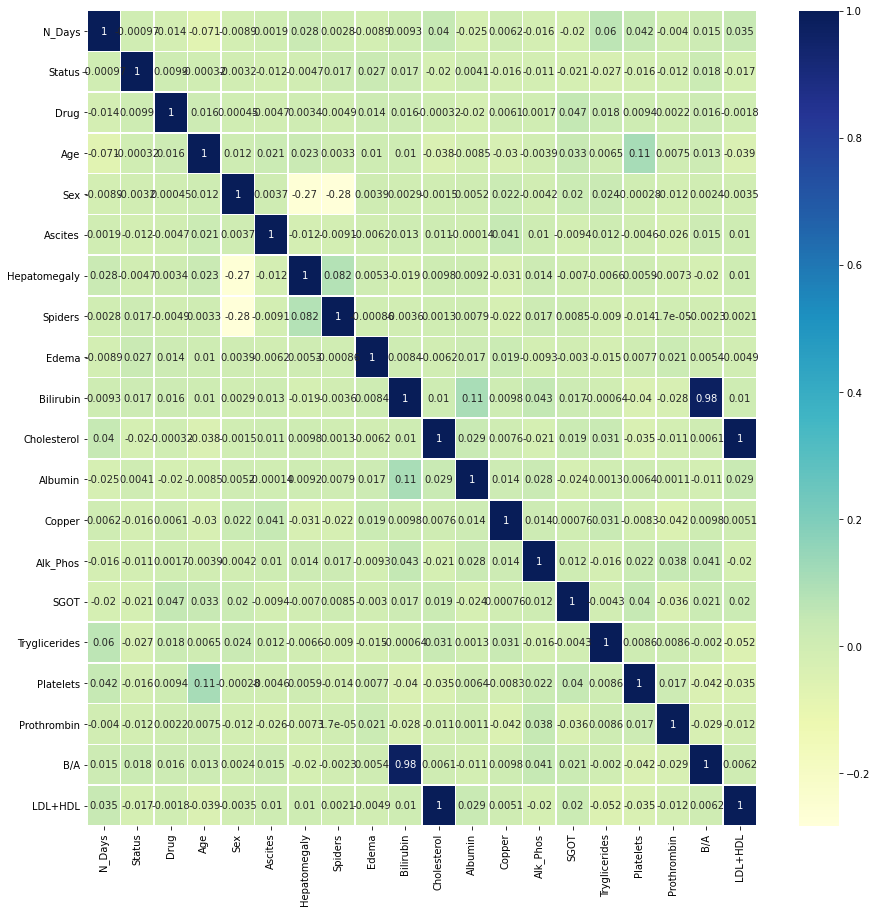

In [479]:
# import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
# sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sb.heatmap(X_train.corr(), cmap="YlGnBu", annot=True,linewidths=.5,ax=ax)
  
# displaying heatmap
mp.show()

In [477]:

# del X_train['Tryglicerides']


In [480]:
del X_train['Cholesterol']

In [481]:

# del X_train['LDL+HDL']


In [482]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [483]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5925 entries, 0 to 6799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         5925 non-null   float64
 1   Status         5925 non-null   int32  
 2   Drug           5925 non-null   int32  
 3   Age            5925 non-null   float64
 4   Sex            5925 non-null   int32  
 5   Ascites        5925 non-null   int32  
 6   Hepatomegaly   5925 non-null   int32  
 7   Spiders        5925 non-null   int32  
 8   Edema          5925 non-null   int32  
 9   Bilirubin      5925 non-null   float64
 10  Albumin        5925 non-null   float64
 11  Copper         5925 non-null   float64
 12  Alk_Phos       5925 non-null   float64
 13  SGOT           5925 non-null   float64
 14  Tryglicerides  5925 non-null   float64
 15  Platelets      5925 non-null   float64
 16  Prothrombin    5925 non-null   float64
 17  B/A            5925 non-null   float64
 18  LDL+HDL 

In [484]:
X_train.corr()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,B/A,LDL+HDL
N_Days,1.000000,-0.000971,-0.014346,-0.071317,-0.008922,0.001876,0.027575,0.002788,-0.008884,0.009342,-0.024515,0.006208,-0.016047,-0.020019,0.060226,0.042275,-0.003998,0.014637,0.035338
Status,-0.000971,1.000000,0.009910,-0.000318,-0.003248,-0.011842,-0.004700,0.017125,0.026505,0.017131,0.004086,-0.016146,-0.011185,-0.020543,-0.027341,-0.016092,-0.011612,0.018256,-0.017476
Drug,-0.014346,0.009910,1.000000,0.016379,0.000451,-0.004693,0.003368,-0.004927,0.013949,0.015952,-0.019695,0.006063,0.001742,0.047374,0.018216,0.009438,0.002204,0.016498,-0.001817
Age,-0.071317,-0.000318,0.016379,1.000000,0.011652,0.020939,0.023124,0.003341,0.010399,0.010500,-0.008513,-0.029934,-0.003896,0.033337,0.006503,0.108502,0.007450,0.013077,-0.038559
Sex,-0.008922,-0.003248,0.000451,0.011652,1.000000,0.003701,-0.269037,-0.282606,0.003873,0.002914,0.005229,0.021525,-0.004203,0.019509,0.024259,-0.000279,-0.011996,0.002435,-0.003540
Ascites,0.001876,-0.011842,-0.004693,0.020939,0.003701,1.000000,-0.012128,-0.009066,-0.006202,0.012847,-0.000140,0.040676,0.010194,-0.009364,0.012185,-0.004568,-0.026058,0.014598,0.010278
Hepatomegaly,0.027575,-0.004700,0.003368,0.023124,-0.269037,-0.012128,1.000000,0.082089,0.005277,-0.018827,0.009152,-0.030732,0.014042,-0.007043,-0.006620,0.005895,-0.007277,-0.019571,0.010320
Spiders,0.002788,0.017125,-0.004927,0.003341,-0.282606,-0.009066,0.082089,1.000000,-0.000863,-0.003617,0.007850,-0.022215,0.017173,0.008459,-0.009044,-0.014067,0.000017,-0.002343,0.002054
Edema,-0.008884,0.026505,0.013949,0.010399,0.003873,-0.006202,0.005277,-0.000863,1.000000,0.008426,0.017054,0.018698,-0.009275,-0.003034,-0.014897,0.007674,0.020584,0.005352,-0.004948
Bilirubin,0.009342,0.017131,0.015952,0.010500,0.002914,0.012847,-0.018827,-0.003617,0.008426,1.000000,0.108149,0.009788,0.043433,0.017051,-0.000638,-0.039637,-0.027622,0.979844,0.010099


In [485]:
del X_train['N_Days']

In [486]:
X_train[pd.isnull(X_train['B/A'])]

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,B/A,LDL+HDL


In [487]:
del X_train['Bilirubin']

ensemble approach

In [491]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
# model = RandomForestClassifier(max_features=15,max_depth=5).fit(X_train,y_train)
# model1=KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)


In [262]:
weight1={1.0:3.0,2.0:3.2,3.0:4.5,4.0:1.0}

modelrf=RandomForestClassifier(max_depth=7,class_weight=weight1).fit(X_train,y_train)

<b> building the test data</b>

In [263]:




df_test=pd.read_csv('test_mesra.csv')
df_test


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,3870,41,C,Placebo,22553,F,N,NaN,N,N,1.4,247.0,3.62,NaN,NaN,108.65,NaN,169.0,11.6
1,3462,1811,C,D-penicillamine,16223,F,N,Y,N,N,0.3,311.0,2.80,92.0,1748.1,NaN,129.0,321.0,11.5
2,1632,954,C,D-penicillamine,27100,F,N,N,N,N,0.4,NaN,3.56,NaN,NaN,43.52,NaN,296.0,10.3
3,722,1969,D,Placebo,17039,F,N,Y,N,N,1.2,NaN,3.16,NaN,617.1,113.76,NaN,125.0,10.9
4,1000,2721,D,D-penicillamine,17738,F,NaN,NaN,NaN,N,3.2,NaN,2.36,89.0,1782.4,NaN,129.0,138.0,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,2601,4513,D,Placebo,18293,M,NaN,N,N,S,0.3,NaN,2.75,NaN,2063.9,111.68,NaN,563.0,10.9
3196,53,3281,D,NaN,12149,F,N,N,Y,N,4.7,422.0,4.30,106.0,1203.2,32.49,166.0,NaN,10.2
3197,386,1933,D,D-penicillamine,17084,F,NaN,Y,NaN,N,0.8,408.0,3.56,9.0,2358.1,124.70,131.0,234.0,11.6
3198,920,2350,D,Placebo,28650,M,NaN,NaN,N,Y,15.3,258.0,3.21,32.0,1472.7,113.24,130.0,110.0,10.3


In [264]:
df_test['Spiders'].value_counts()

N    1369
Y     631
Name: Spiders, dtype: int64

In [265]:
df_test['Drug'].value_counts()

D-penicillamine    1122
Placebo            1115
Name: Drug, dtype: int64

In [266]:
df_test['Sex'].value_counts()

F    2753
M     447
Name: Sex, dtype: int64

In [267]:
ind1=df_test['ID']
del df_test['ID']

In [268]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         3200 non-null   int64  
 1   Status         3200 non-null   object 
 2   Drug           2237 non-null   object 
 3   Age            3200 non-null   int64  
 4   Sex            3200 non-null   object 
 5   Ascites        2113 non-null   object 
 6   Hepatomegaly   2098 non-null   object 
 7   Spiders        2000 non-null   object 
 8   Edema          3200 non-null   object 
 9   Bilirubin      3200 non-null   float64
 10  Cholesterol    1765 non-null   float64
 11  Albumin        3200 non-null   float64
 12  Copper         2194 non-null   float64
 13  Alk_Phos       2032 non-null   float64
 14  SGOT           2213 non-null   float64
 15  Tryglicerides  1914 non-null   float64
 16  Platelets      3036 non-null   float64
 17  Prothrombin    3136 non-null   float64
dtypes: float

In [269]:
print(df_test['Drug'].unique())
print(df_test['Drug'].value_counts())

df_test[pd.isnull(df_test['Drug'])] ##there are missing values =2025

## fill them using backfill method
df_test['Drug']=df_test['Drug'].fillna(method='bfill')

print(df_test['Drug'].unique())
print(df_test['Drug'].value_counts())
df_test[pd.isnull(df_test['Drug'])]

['Placebo' 'D-penicillamine' nan]
D-penicillamine    1122
Placebo            1115
Name: Drug, dtype: int64
['Placebo' 'D-penicillamine']
D-penicillamine    1600
Placebo            1600
Name: Drug, dtype: int64


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin


In [270]:
## since the age is in days we convert it to years by dividing by 365

df_test[pd.isnull(df_test['Age'])] # no misiing values

df_test['Age']=(df_test['Age']/365)
df_test



,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,41,C,Placebo,61.789041,F,N,NaN,N,N,1.4,247.0,3.62,NaN,NaN,108.65,NaN,169.0,11.6
1,1811,C,D-penicillamine,44.446575,F,N,Y,N,N,0.3,311.0,2.80,92.0,1748.1,NaN,129.0,321.0,11.5
2,954,C,D-penicillamine,74.246575,F,N,N,N,N,0.4,NaN,3.56,NaN,NaN,43.52,NaN,296.0,10.3
3,1969,D,Placebo,46.682192,F,N,Y,N,N,1.2,NaN,3.16,NaN,617.1,113.76,NaN,125.0,10.9
4,2721,D,D-penicillamine,48.597260,F,NaN,NaN,NaN,N,3.2,NaN,2.36,89.0,1782.4,NaN,129.0,138.0,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,4513,D,Placebo,50.117808,M,NaN,N,N,S,0.3,NaN,2.75,NaN,2063.9,111.68,NaN,563.0,10.9
3196,3281,D,D-penicillamine,33.284932,F,N,N,Y,N,4.7,422.0,4.30,106.0,1203.2,32.49,166.0,NaN,10.2
3197,1933,D,D-penicillamine,46.805479,F,NaN,Y,NaN,N,0.8,408.0,3.56,9.0,2358.1,124.70,131.0,234.0,11.6
3198,2350,D,Placebo,78.493151,M,NaN,NaN,N,Y,15.3,258.0,3.21,32.0,1472.7,113.24,130.0,110.0,10.3


In [271]:
df_test['Age']=df_test['Age'].astype(int) ## converting the age column to int
df_test

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,41,C,Placebo,61,F,N,NaN,N,N,1.4,247.0,3.62,NaN,NaN,108.65,NaN,169.0,11.6
1,1811,C,D-penicillamine,44,F,N,Y,N,N,0.3,311.0,2.80,92.0,1748.1,NaN,129.0,321.0,11.5
2,954,C,D-penicillamine,74,F,N,N,N,N,0.4,NaN,3.56,NaN,NaN,43.52,NaN,296.0,10.3
3,1969,D,Placebo,46,F,N,Y,N,N,1.2,NaN,3.16,NaN,617.1,113.76,NaN,125.0,10.9
4,2721,D,D-penicillamine,48,F,NaN,NaN,NaN,N,3.2,NaN,2.36,89.0,1782.4,NaN,129.0,138.0,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,4513,D,Placebo,50,M,NaN,N,N,S,0.3,NaN,2.75,NaN,2063.9,111.68,NaN,563.0,10.9
3196,3281,D,D-penicillamine,33,F,N,N,Y,N,4.7,422.0,4.30,106.0,1203.2,32.49,166.0,NaN,10.2
3197,1933,D,D-penicillamine,46,F,NaN,Y,NaN,N,0.8,408.0,3.56,9.0,2358.1,124.70,131.0,234.0,11.6
3198,2350,D,Placebo,78,M,NaN,NaN,N,Y,15.3,258.0,3.21,32.0,1472.7,113.24,130.0,110.0,10.3


In [272]:
df_test['Prothrombin'].value_counts()

10.7    148
10.8    148
11.4    145
11.6    143
10.9    138
       ... 
15.4      3
15.6      3
15.2      3
15.3      2
15.5      1
Name: Prothrombin, Length: 67, dtype: int64

In [273]:

## Ascitesis when too much fluid builds up in your abdomen

print(df_test['Ascites'].unique())
print(df_test['Ascites'].value_counts())

df_test[pd.isnull(df_test['Ascites'])] ##there are missing values =2246

# ## fill them using backfill method

cond =  df_test['Age'] >30 

df_test['Ascites'] =df_test['Ascites'].fillna('N')

print(df_test['Ascites'].unique())
print(df_test['Ascites'].value_counts())
df_test[pd.isnull(df_test['Ascites'])]

['N' nan 'Y']
N    1876
Y     237
Name: Ascites, dtype: int64
['N' 'Y']
N    2963
Y     237
Name: Ascites, dtype: int64


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin


In [274]:

## Ascitesis when too much fluid builds up in your abdomen

print(df_test['Hepatomegaly'].unique())
print(df_test['Hepatomegaly'].value_counts())

df_test[pd.isnull(df_test['Hepatomegaly'])] ##there are missing values =2246

cond = df_test['Sex'] == 'F'
df_test['Hepatomegaly'] =df_test['Hepatomegaly'].fillna('N')

print(df_test['Hepatomegaly'].unique())
print(df_test['Hepatomegaly'].value_counts())
df_test[pd.isnull(df_test['Hepatomegaly'])]

[nan 'Y' 'N']
N    1231
Y     867
Name: Hepatomegaly, dtype: int64
['N' 'Y']
N    2333
Y     867
Name: Hepatomegaly, dtype: int64


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin


In [275]:
## Spider angiomas may appear when the body has increased levels of oestrogen hormones such as in pregnancy 
## or when taking the oral contraceptive pill. They may also occasionally occur in patients with liver or thyroid disease. 

print(df_test['Spiders'].unique())
print(df_test['Spiders'].value_counts())


## since presence of spiders is mostly in women so we will fill the null values with yes if corres sex is femeale

cond = df_test['Sex'] == 'F'
df_test['Spiders'] =df_test['Spiders'].fillna('N')

df_test[pd.isnull(df_test['Spiders'])]

print(df_test['Spiders'].unique())
print(df_test['Spiders'].value_counts())

['N' nan 'Y']
N    1369
Y     631
Name: Spiders, dtype: int64
['N' 'Y']
N    2569
Y     631
Name: Spiders, dtype: int64


In [276]:
print(df_test['Edema'].unique())
print(df_test['Edema'].value_counts())
df_test[pd.isnull(df_test['Edema'])]

## 'S' and 'Y' means edema is present so we can convert 'S' to 'Y'
df_test['Edema'].replace({'S': 'Y'}, inplace=True)

print(df_test['Edema'].unique())
print(df_test['Edema'].value_counts())

['N' 'S' 'Y']
N    2481
S     519
Y     200
Name: Edema, dtype: int64
['N' 'Y']
N    2481
Y     719
Name: Edema, dtype: int64


In [277]:
# df_test['Cholesterol']=df_test['Cholesterol'].fillna(df_test['Cholesterol'].mean())

meanf=df_test.groupby('Sex').mean().loc['F']['Cholesterol']
meanm=df_test.groupby('Sex').mean().loc['M']['Cholesterol']

cond = df_test['Sex'] == 'F'
df_test['Cholesterol'] =df_test['Cholesterol'].fillna(cond.map({True:meanf, False: meanm}))

In [278]:
df_test['Albumin']=df_test['Albumin']*1000

In [279]:
# df_test['Copper']=df_test['Copper'].fillna(df_test['Copper'].mean())

meanf=df_test.groupby('Sex').mean().loc['F']['Copper']
meanm=df_test.groupby('Sex').mean().loc['M']['Copper']

cond = df_test['Sex'] == 'F'
df_test['Copper'] =df_test['Copper'].fillna(cond.map({True:meanf, False: meanm}))

df_test['Copper']=df_test['Copper']*0.001

In [280]:
# df_test['Alk_Phos']=df_test['Alk_Phos'].fillna(df_test['Alk_Phos'].mean())
meanf=df_test.groupby('Sex').mean().loc['F']['Alk_Phos']
meanm=df_test.groupby('Sex').mean().loc['M']['Alk_Phos']

cond = df_test['Sex'] == 'F'
df_test['Alk_Phos'] =df_test['Alk_Phos'].fillna(cond.map({True:meanf, False: meanm}))

## alk phos is in units/liter so convert it to units/dl divide by 10
df_test['Alk_Phos']=df_test['Alk_Phos']/10

In [281]:
# df_test['SGOT']=df_test['SGOT'].fillna(df_test['SGOT'].mean())
meanf=df_test.groupby('Sex').mean().loc['F']['SGOT']
meanm=df_test.groupby('Sex').mean().loc['M']['SGOT']

cond = df_test['Sex'] == 'F'
df_test['SGOT'] =df_test['SGOT'].fillna(cond.map({True:meanf, False: meanm}))

df_test['SGOT']=df_test['SGOT']*100

In [282]:

# df_test['Tryglicerides']=df_test['Tryglicerides'].fillna(df_test['Tryglicerides'].mean())

meanf=df_test.groupby('Sex').mean().loc['F']['Tryglicerides']
meanm=df_test.groupby('Sex').mean().loc['M']['Tryglicerides']

cond = df_test['Sex'] == 'F'
df_test['Tryglicerides'] =df_test['Tryglicerides'].fillna(cond.map({True:meanf, False: meanm}))

In [283]:
# df_test['Platelets']=df_test['Platelets'].fillna(df_test['Platelets'].mean())

meanf=df_test.groupby('Sex').mean().loc['F']['Platelets']
meanm=df_test.groupby('Sex').mean().loc['M']['Platelets']

cond = df_test['Sex'] == 'F'
df_test['Platelets'] =df_test['Platelets'].fillna(cond.map({True:meanf, False: meanm}))

df_test['Platelets']=df_test['Platelets']*0.01

In [284]:
# df_test['Prothrombin']=df_test['Prothrombin'].fillna(df_test['Prothrombin'].mean())


meanf=df_test.groupby('Sex').mean().loc['F']['Prothrombin']
meanm=df_test.groupby('Sex').mean().loc['M']['Prothrombin']

cond = df_test['Sex'] == 'F'
df_test['Prothrombin'] =df_test['Prothrombin'].fillna(cond.map({True:meanf, False: meanm}))

In [285]:
df_test['LDL+HDL']=df_test['Cholesterol']-(df_test['Tryglicerides']/5)

In [286]:
df_test['B/A']=df_test['Bilirubin']/df_test['Albumin']

In [287]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5925 entries, 0 to 6799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         5925 non-null   int32  
 1   Drug           5925 non-null   int32  
 2   Age            5925 non-null   float64
 3   Sex            5925 non-null   int32  
 4   Ascites        5925 non-null   int32  
 5   Hepatomegaly   5925 non-null   int32  
 6   Spiders        5925 non-null   int32  
 7   Edema          5925 non-null   int32  
 8   Albumin        5925 non-null   float64
 9   Copper         5925 non-null   float64
 10  Alk_Phos       5925 non-null   float64
 11  SGOT           5925 non-null   float64
 12  Tryglicerides  5925 non-null   float64
 13  Platelets      5925 non-null   float64
 14  Prothrombin    5925 non-null   float64
 15  B/A            5925 non-null   float64
 16  LDL+HDL        5925 non-null   float64
dtypes: float64(10), int32(7)
memory usage: 671.2 KB


In [288]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         3200 non-null   int64  
 1   Status         3200 non-null   object 
 2   Drug           3200 non-null   object 
 3   Age            3200 non-null   int32  
 4   Sex            3200 non-null   object 
 5   Ascites        3200 non-null   object 
 6   Hepatomegaly   3200 non-null   object 
 7   Spiders        3200 non-null   object 
 8   Edema          3200 non-null   object 
 9   Bilirubin      3200 non-null   float64
 10  Cholesterol    3200 non-null   float64
 11  Albumin        3200 non-null   float64
 12  Copper         3200 non-null   float64
 13  Alk_Phos       3200 non-null   float64
 14  SGOT           3200 non-null   float64
 15  Tryglicerides  3200 non-null   float64
 16  Platelets      3200 non-null   float64
 17  Prothrombin    3200 non-null   float64
 18  LDL+HDL 

In [289]:
df_test['B/A']=df_test['Bilirubin']/df_test['Albumin']

In [290]:
categ

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [291]:
for i in categ:
    print(df_test[i].unique())

['C' 'D' 'CL']
['Placebo' 'D-penicillamine']
['F' 'M']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']


In [292]:

print(df_test['Status'].unique())

print(df_test['Drug'].unique())

print(df_test['Sex'].unique())

print(df_test['Ascites'].unique())

print(df_test['Hepatomegaly'].unique())

print(df_test['Spiders'].unique())
print(df_test['Edema'].unique())

df_test[categ] = df_test[categ].apply(scaler.fit_transform)

print(df_test['Status'].unique())

print(df_test['Drug'].unique())

print(df_test['Sex'].unique())

print(df_test['Ascites'].unique())

print(df_test['Hepatomegaly'].unique())

print(df_test['Spiders'].unique())
print(df_test['Edema'].unique())

['C' 'D' 'CL']
['Placebo' 'D-penicillamine']
['F' 'M']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']
[0 2 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [293]:
df_test[scalecols] = scaler_other.transform(df_test[scalecols])

In [294]:
del df_test['Cholesterol']



In [295]:
del df_test['Bilirubin']

In [296]:
del df_test['N_Days']

In [297]:
# del df_test['Prothrombin']
# del df_test['LDL+HDL']
# del df_test['Tryglicerides']

<b>predicting </b>

In [298]:
X_test=df_test
X_test

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,LDL+HDL,B/A
0,0,1,-0.089373,0,0,0,0,0,1.105575,-0.039739,-0.026430,0.806253,0.025638,-1.107511,0.332266,-0.505298,-0.196727
1,0,0,-1.417503,0,0,1,0,0,-0.447086,0.475573,-0.042564,0.006303,-0.134144,0.246740,0.242215,0.184015,-0.452389
2,0,0,0.926256,0,0,0,0,0,0.991966,-0.039739,-0.026430,-0.997925,0.025638,0.024001,-0.838396,-0.060290,-0.447619
3,2,1,-1.261252,0,0,1,0,0,0.234570,-0.039739,-0.921085,0.947806,0.025638,-1.499531,-0.298091,-0.060290,-0.203122
4,2,0,-1.105002,0,0,0,0,0,-1.280222,0.414699,-0.015921,0.006303,-0.134144,-1.383707,-0.568243,-0.048047,0.689494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,2,1,-0.948751,1,0,0,0,1,-0.541761,-0.019689,0.202739,0.890188,0.048191,2.402849,-0.298091,-0.101243,-0.450608
3196,2,0,-2.276881,0,0,0,1,0,2.393149,0.759651,-0.465823,-1.303469,0.887581,-0.002246,-0.928447,1.280022,0.449092
3197,2,0,-1.261252,0,0,1,0,0,0.991966,-1.208601,0.431263,1.250857,-0.078916,-0.528390,0.332266,1.205967,-0.344878
3198,2,1,1.238757,1,0,0,0,1,0.329245,-0.741902,-0.256485,0.933401,-0.106530,-1.633174,-0.838396,-0.378799,3.807958


In [299]:
y_pred=modelrf.predict(X_test)

In [300]:
ans=pd.DataFrame(y_pred)
ans


,0
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0
...,...
3195,3.0
3196,3.0
3197,2.0
3198,3.0


In [301]:
# ans[0]=ans[0]+1
# ans[0]=ans[0].astype(float)
ans[0].value_counts()

3.0    2455
1.0     515
2.0     230
Name: 0, dtype: int64

In [302]:
ans.rename(columns={0:'Stage'},inplace=True)

In [303]:
ans.index=ind1


In [304]:
ans.to_csv('mesra.csv')

In [305]:
# use 33 as final